# Importing the initial libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Before the model is created, we import the necessary libraries our model will use. These libraries are numpy, pandas, statsmodels.api, matplotlib and seaborn. Details on these libraries can be found in my report.

In [3]:
raw_data = pd.read_csv('csv_result-messidor_features.csv')
raw_data.rename(columns={"0": "Quality?", "1": "Severe RA?", "2": "MA Det #1", "3": "MA Det #2", "4": "MA Det #3"
                        , "5": "MA Det #4", "6": "MA Det #5", "7": "MA Det #6", "8": "Exudate #1", "9": "Exudate #2"
                        , "10": "Exudate #3", "11": "Exudate #4", "12": "Exudate #5", "13": "Exudate #6", "14": "Exudate #6"
                        , "15": "Exudate #7", "16": "Macular Retinal Condition", "17": "Optic Diameter", "18": "AM/FM Result"
                        , "Class": "DR?"})

,id,Quality?,Severe RA?,MA Det #1,MA Det #2,MA Det #3,MA Det #4,MA Det #5,MA Det #6,Exudate #1,...,Exudate #3,Exudate #4,Exudate #5,Exudate #6,Exudate #6,Exudate #7,Macular Retinal Condition,Optic Diameter,AM/FM Result,DR?
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1147,1,1,34,34,34,33,31,24,6.071765,...,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1148,1,1,49,49,49,49,45,37,63.197145,...,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1149,1,0,49,48,48,45,43,33,30.461898,...,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1150,1,1,39,36,29,23,13,7,40.525739,...,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [4]:
y = raw_data['Class']
x1 = raw_data['16']

# Logistic Regression Model

Optimization terminated successfully.
         Current function value: 0.691208
         Iterations 4


<function matplotlib.pyplot.show(*args, **kw)>

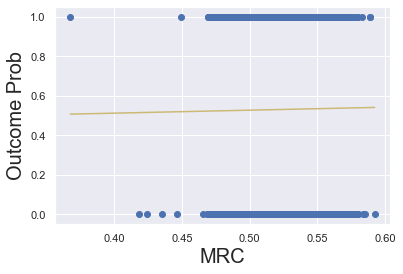

In [5]:
x = sm.add_constant(x1) # fit a constant
reg_log = sm.Logit(y, x) # setting the regression variable, using sm.logit to create regression
results_log = reg_log.fit() # fit regression using ML

def sig_func(x, a0, a1):
    return np.array(np.exp(a0 + x * a1) / (1 + np.exp(a0 + x * a1))) # a0 and a1 are function params

f_sorted = np.sort(sig_func(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color = 'C0')
plt.xlabel("MRC", fontsize = 20)
plt.ylabel("Outcome Prob", fontsize = 20)
plt.plot(x_sorted, f_sorted, color = 'C8')
plt.show

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1151 non-null   int64  
 1   0       1151 non-null   int64  
 2   1       1151 non-null   int64  
 3   2       1151 non-null   int64  
 4   3       1151 non-null   int64  
 5   4       1151 non-null   int64  
 6   5       1151 non-null   int64  
 7   6       1151 non-null   int64  
 8   7       1151 non-null   int64  
 9   8       1151 non-null   float64
 10  9       1151 non-null   float64
 11  10      1151 non-null   float64
 12  11      1151 non-null   float64
 13  12      1151 non-null   float64
 14  13      1151 non-null   float64
 15  14      1151 non-null   float64
 16  15      1151 non-null   float64
 17  16      1151 non-null   float64
 18  17      1151 non-null   float64
 19  18      1151 non-null   int64  
 20  Class   1151 non-null   int64  
dtypes: float64(10), int64(11)
memory usag

In [7]:
data = raw_data.drop(['id'], axis = 1)
data = data.drop(['0'], axis = 1)

targets = raw_data['Class'] # our target, since this shows if a patient has DR.
unscaled_inputs = data.iloc[:, :-1] # unscaled inputs.
unscaled_inputs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0
1147,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0
1148,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0
1149,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1


In [8]:
from sklearn.preprocessing import StandardScaler # library to scale data, to get better results.

scaler = StandardScaler()
scaler.fit(unscaled_inputs)
scaled_inputs = scaler.transform(unscaled_inputs) # standardisation

scaled_inputs

array([[ 0.2982129 , -0.6414863 , -0.61878225, ..., -1.29476283,
        -0.46865568,  1.40504812],
       [ 0.2982129 , -0.56339113, -0.53577796, ..., -0.08216786,
         2.00605415, -0.7117194 ],
       [ 0.2982129 ,  0.92041699,  0.9582994 , ...,  0.27428264,
         1.1215164 , -0.7117194 ],
       ...,
       [-3.35330894,  0.41279842,  0.46027361, ...,  1.33436273,
         1.19371332, -0.7117194 ],
       [ 0.2982129 ,  0.0223226 , -0.03775217, ..., -1.32796165,
        -0.09707846,  1.40504812],
       [ 0.2982129 , -1.22720003, -1.24131448, ...,  1.17603538,
        -1.08570243, -0.7117194 ]])

# Train and Test Data

In [9]:
from sklearn.model_selection import train_test_split # library to split into training and testing data

train_test_split(scaled_inputs, targets) # split input from target

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8) # 80:20 split

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Libraries to form a basic LR model

regression = LogisticRegression() #LR from sklearn
regression.fit(x_train, y_train) #fits to a ML algorithm
regression.score(x_train, y_train) #accuracy
# ^training the LR model 

0.7380434782608696

In [11]:
variable_name = unscaled_inputs.columns.values
summary_table = pd.DataFrame(columns = ['Variable Name'], data = variable_name)
summary_table["Coefficient"] = np.transpose(regression.coef_)
summary_table["Odds Ratio"] = np.exp(summary_table.Coefficient)
summary_table
# This lists the coefficient and odds ratio for each model variable, the higher the odds level,  
# the higher the variable has on affecting the final "DR?" outcome.

,Variable Name,Coefficient,Odds Ratio
0,1,-0.234535,0.790939
1,2,5.197249,180.774184
2,3,1.049951,2.857511
3,4,-1.485240,0.226448
4,5,-2.368064,0.093662
5,6,-1.714730,0.180012
6,7,0.378018,1.459389
7,8,0.417481,1.518132
8,9,-0.308330,0.734673
9,10,0.153388,1.165777


In [12]:
regression.score(x_test, y_test) #regression model accuraccy test

0.7142857142857143

In [13]:
import pickle #save both our model and scaler.

In [14]:
with open('model', 'wb') as file:
    pickle.dump(regression, file)

In [15]:
with open('scaler', 'wb') as file:
    pickle.dump(scaler, file)